### Outline
1. Steps in ML projects
2. Illustration through practical setup

## ML Project
- Excellent wine company wants to develop ML model for ***predicting wine quality*** on certain ***physiochemical characteristics*** in order to replace expensive quality sensor.
- Let's understand the steps involved in addressing the problem.
- Steps involved in ML projects are:
	1. Look at the big picture.
	2. Get the data.
	3. Discover and visualize the data to gain insights.
	4. Prepare the data for Machine learning algorithms.
	5. Select a model and train it.
	6. Fine-tune the model.
	7. Present your solution.
	8. Launch, monitor and maintain your system.
- ML is usually a small piece in a big project. e.g. wine quality prediction is a small piece in setting up the manufacturing process.
- Typically 10-15% of time is spent on ML.
- A lot more time is spent on capturing and processing data needed for ML and taking decisions based on output of ML module.
- Needs strong collaboration with domain experts, product managers and engineering teams for successful execution.

## Step 1: Look at the big picture.
1. Frame the problem
2. Select the performance measure.
3. List and check the assumptions.
	1. Frame the problem
		- What is the input and output?
		- What is the business objective? How does company expects to use and benefit from the model?
			- Useful in problem framing
			- Algorithm and performance measure selection.
			- Overall effort estimation.
		- What is the current solution (if any)?
			- Provides the useful baseline
            
### 1.1 Design consideration in problem framing
- Is this a **supervised, unsupervised or reinforcement learning** problem?
- Is this a **classification, regression** or some other task?
- What is the nature of output: **single** or **multiple** outputs?
- Does the system need a **continous learning** or **periodic updates**?
- What would be the learning style: **batch** or **online**?

### 1.2 Selection of performance measure
- Regression
	- Mean Squared Error (MSE) or
	- Mean Absolute Error (MAE)
- Classification
	- Precision
	- Recall
	- F-1 Score
	- Accuracy
    
### 1.3 Check the assumptions
- List down the various assumptions about the task
- Review with domain experts and other teams that plan to consume ML output.
- Make sure all the assumptions are reviewed and approved before coding!

## Step 2: Get the data
- Data spread across multiple tables, files or documents with access control.
- Obtain appropriate access controls and authorizations.
- Get familiarized with data by looking at schema and few rows (Familiarity with SQL would be useful here)

Load basic libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

- Lets first access our data - in this case, we need to download it from web.
- It's a good practice to create a function for downloading and extracting the data

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(data_url, sep=";")

### 2.1 Check data samples
Now that data is loaded, lets examine it.

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2.2 Features
It's a good idea to understand significance of each feature by consulting the experts.

| Feature | Significance |
| :- | :-|
| Fixed acidity | Most acids involved with wine are fixed or non volatile ( do not evaporate readily) |
| Volatile acidity | The amount of acetic acid in wine, which at too high levels can lead to unplesant, vinegar taste|
| Citric Acid | Found in small quantities, citric acid can add 'freshness' and flavour to wines.
| Residual Sugar | It's rare to find wines with less than 1 gram/liter and wines with greater than 45gram/liter are considered sweet |
| Chlorides | The amount of salt in wine |
| **.** | **.** |
| **.** | **.** |
| **.** | **.** |
| Alchohol | The percentage of alchohol contents in wine |

(Credits:https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

In [4]:
feature_list = data.columns[:-1].values
label = [data.columns[-1]]
print("Feature List:", feature_list)
print("Label:", label)

Feature List: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: ['quality']


### 2.3 Data Statistics
Lets use ``info()`` method to get quick description of data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- Total entries: 1599 (Tiny dataset by ML standard)
- There are total 12 columns: 11 features + 1 label
    - Label column: **quality**
    - Features: \['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar','chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH','sulphates' 'alcohol'\]
    - All columns are numeric(float64) and label is an integer.

In order to understand nature of numeric attributes, we use ``describe()`` method.

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This one prints counts and statistical properties of data like - **mean, standard deviation,quartiles**

- The wine quality can be between 0 and 10, but in this dataset, the quality values are between 3 and 8. Let's look at the distribution of examples by the wine quality.

In [7]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

- Higher quality value --> better quality of wine
- You can see that there are lots of samples of average wines than good or the poor quality ones.
    - Many examples are wines with quality = 5 or 6

The information can be viewed through histogram plot
- A histogram gives the count of how many samples occurs within a specific range (bins).
- The x-axis denotes the range of values in a feature and 
- The y-axis denotes the frequency of samples with those specific values.

Text(0, 0.5, 'Count')

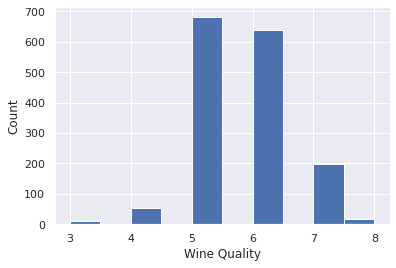

In [8]:
sns.set()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')
# Note taller bars for quality 5 and 6 compared to the other qualities.

In similar manner we can plot all the numerical attributes with histogram plot for quick examination
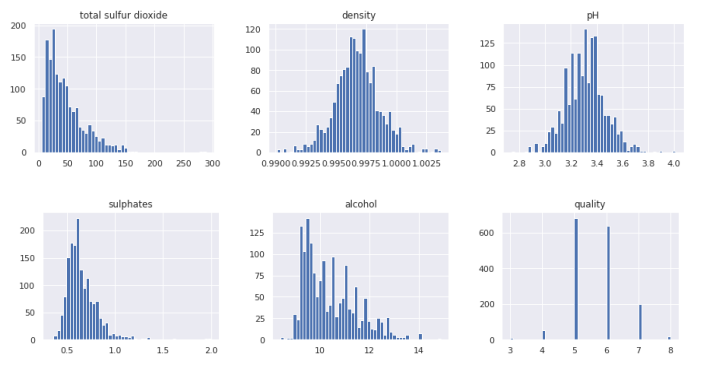
A few observations based on these plots:
1. Features are at different scales
2. Features have different distributions-
    - A few are tail heavy e.g: residual sugar, free SO<sub>2</sub>
    - A few have multiple modes e.g: volitile acidity, citric acid
    
Before further exploration, it's a good idea to separate test set and do not look at it in order to have a clean evaluation set

### 2.4 Create test set
- When we look at the test set, we are likely to notice patterns in that and based on that we may select certain models.
- This leads to biased estimation on test set, which maynot generalize well in practice. This is called **data snooping bias**.

Lets write a function to split the data into training and test . Make sure to set the seed so that we get the same test set in the next run.

In [9]:
def split_train_test(data, test_ratio):
    # set the random seed
    np.random.seed(42)
    
    #shuffle the dataset.
    shuffled_indices = np.random.permutation(len(data))
    
    #calculate the size of test set.
    test_set_size = int(len(data) * test_ratio)
    
    #split the dataset to get the training and test sets.
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(data,0.2)

Scikit-learn provides a few functions for creating test sets based on
1. **Random sampling**: which randomly selects *k*% points in the test set.
2. **Stratified sampling**: which samples test examples such that they are representative of overall distribution.

#### Random Sampling
- ``train_test_split()`` function performs random sampling with
    - **random_state** parameter to set the random seed, which ensures that the same examples are selected for test sets across runs
    - **test_size** parameter for specifying size of test size
    - **shuffle flag** to specify if the data needs to be shuffled before splitting
- Provision for processing multiple data sets with an identical number of rows and selecting the same indices from these datasets
    - Useful when labels are in different dataframe

In [10]:
from sklearn.model_selection import train_test_split
# We can learn more about this function by using the following line of code
?train_test_split

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train_

In [11]:
#Lets perform random sampling on our dataset
train_set, test_set = train_test_split(data,test_size=0.2,random_state=42)

### Stratified sampling
- Data distribution may not be uniform in real world data
- Random sampling - by nature - introduces biases in such datasets

Recall the histogram of label distribution in our dataset: its not uniform!
- Many examples of class 5 and 6 compared to the other classes
- This causes a problem while random sampling. The test distribution may not match with the overall distribution

**How do we sample in such cases?**
- We divide the population into homogenous groups called **strata**
- Data is sampled from each stratum so as to match the whole data distribution.
- Scikit-learn provides a class called ``StratifiedShuffleSplit`` that helps us in stratified sampling.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(data,data['quality']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [13]:
#Let's examine the test set distribution by the wine quality that was used for stratified sampling.
strat_dist = strat_test_set["quality"].value_counts() / len(strat_test_set)


In [14]:
# Now compare this with the overall distribution
overall_dist = data["quality"].value_counts() / len(data)

In [15]:
# Side by side comparision
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist})
dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(s-o)_pct'] = 100*(dist_comparison['diff(s-o)']/dist_comparison['overall'])

In [16]:
dist_comparison

,overall,stratified,diff(s-o),diff(s-o)_pct
5,0.425891,0.425000,-0.000891,-0.209251
6,0.398999,0.400000,0.001001,0.250784
7,0.124453,0.125000,0.000547,0.439698
4,0.033146,0.034375,0.001229,3.708726
8,0.011257,0.009375,-0.001882,-16.718750
3,0.006254,0.006250,-0.000004,-0.062500


In [17]:
# Let's contrast this with random sampling:
random_dist = test_set["quality"].value_counts() / len(test_set)
random_dist

6    0.412500
5    0.406250
7    0.131250
4    0.031250
8    0.015625
3    0.003125
Name: quality, dtype: float64

**Sampling bias comparison**
Compare the difference in distribution of stratified and uniform sampling:
- Stratified sampling gives us test distribution closer to the overall distribution than the random sampling
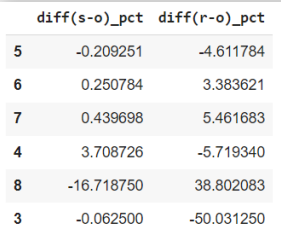

### Step 3: Data Visualization
- Performed on training set
- In case of large training set -
    - Sample examples to form **exploration set**
- Enables to understand features and their relationship among themselves and with output label

In our case we have a small training data and we use it all for data exploration. There is no need to create a separate exploration set.

It's a good idea to create a copy of the training set so that we can freely manipulate it without worrying about any manipulation in the original set.

In [18]:
exploration_set = strat_train_set.copy()

#### Scatter Visualization
with seaborn library:

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

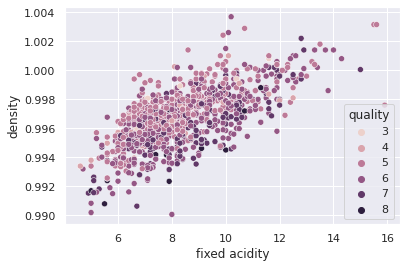

In [19]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality',data=exploration_set)

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

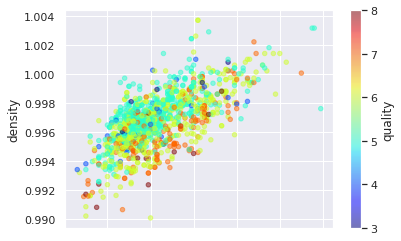

In [20]:
# With matplotlib
exploration_set.plot(kind='scatter', x='fixed acidity', y='density', alpha=0.5,c="quality", cmap=plt.get_cmap("jet"))

#### Relationship between features
- **Standard correlation coefficient** between features.
    - Ranges between -1 and +1
        - **Correlation = +1**: Strong positive correlation between features
        - **Correlation = -1**: Strong negative correlation between features
        - **Correlation = 0**: No linear correlation between features
    - Visualization with heat map
- Only captures linear relationship between features.
    - For non-linear relationship, use **rank correlation**
    
Let's calculate correlations between our features.

In [21]:
corr_matrix = exploration_set.corr()

#Let's check features that are correlated with the label, which is quality in our case.
'''
Notice that quality has strong positive correlation with alcohol content [0.48] and strong negative correlation 
with volitile acidity [-0.38].
'''
corr_matrix['quality']

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:>

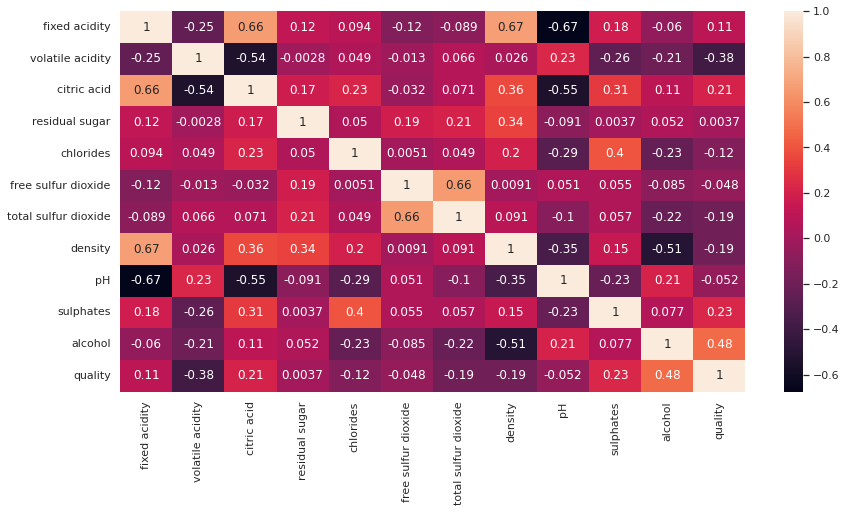

In [22]:
# Let's visualize correlation matrix with heatmap:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)

#### You can notice:
- The correlation coefficient on diagonal is +1.
- Darker colors represent negative correlations, while fainter colors denote positive correlations. For example
    - citric acid and fixed acidity have strong positive correlation.
    - pH and fixed acidity have strong negative correlation.

Another option to visualize the relationship between the feature is with scatter matrix.

array([[<AxesSubplot:xlabel='citric acid', ylabel='citric acid'>,
        <AxesSubplot:xlabel='pH', ylabel='citric acid'>,
        <AxesSubplot:xlabel='alcohol', ylabel='citric acid'>,
        <AxesSubplot:xlabel='sulphates', ylabel='citric acid'>,
        <AxesSubplot:xlabel='quality', ylabel='citric acid'>],
       [<AxesSubplot:xlabel='citric acid', ylabel='pH'>,
        <AxesSubplot:xlabel='pH', ylabel='pH'>,
        <AxesSubplot:xlabel='alcohol', ylabel='pH'>,
        <AxesSubplot:xlabel='sulphates', ylabel='pH'>,
        <AxesSubplot:xlabel='quality', ylabel='pH'>],
       [<AxesSubplot:xlabel='citric acid', ylabel='alcohol'>,
        <AxesSubplot:xlabel='pH', ylabel='alcohol'>,
        <AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='sulphates', ylabel='alcohol'>,
        <AxesSubplot:xlabel='quality', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='citric acid', ylabel='sulphates'>,
        <AxesSubplot:xlabel='pH', ylabel='sulphates'>,
        <A

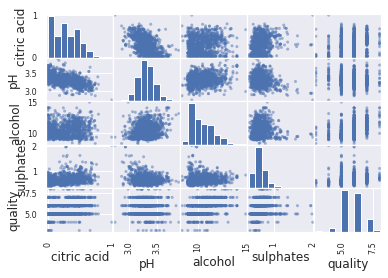

In [23]:
from pandas.plotting import scatter_matrix
attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
scatter_matrix(exploration_set[attribute_list])
# Similar analysis can be carried out with combined features - features that are derived from the original features.

#### Note of wisdom
1. Visualization and data exploration do not have to be absolutely thorough.
2. Objective is to get quick insight into features and its relationship with other features and labels.
3. Exploration is an iterative process: Once we build model and obtain more insights, we can come back to this step.

## Step 4: Prepare data for ML algorithm
- We often need to preprocess the data before using it for model building due to variety of reasons:
  - Due to errors in data capture, data may contain outliers or missing values.
  - Different features may be at different scales.
  - The current data distribution is not exactly amenable to learning.

Typical steps in data preprocessing are as follows:
1. Separate features and labels.
2. Handling missing values and outliers.
3. Feature scaling to bring all features on the same scale.
4. Applying certain transformations like log, square root on the features.

It's a good practice to make a copy of the data and apply preprocessing on that copy. This ensures that in case something goes wrong, we will at least have original copy of the data intact.

### 4.1 Separate features and labels from the training set.

In [24]:
# Copy all features leaving aside the label.
wine_features = strat_train_set.drop("quality", axis=1)
# Copy the label list
wine_labels = strat_train_set['quality'].copy()

### 4.2 Data cleaning
Let's first check if there are any missing values in feature set: One way to find that out is column-wise.

In [25]:
wine_features.isna().sum() # counts the number of NaN in each column of wine_features

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In this dataset, we do not have any missing values.
In case, we have non-zero numbers in any columns, we have a problem of missing values.
- These values are missing due to errors in recording or they do not exist.
- If they are not recorded:
  - Use imputation technique to fill up the missing values.
  - Drop the rows containing missing values.
- If they do not exists, it is better to keep it as NaN.

Sklearn provides the following methods to drop rows containing missing values:
- ``dropna()``
- ``drop()``

It provides **SimpleImputer** class for filling up missing values with. say, median value cause sometimes throwing away data might be costly


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [27]:
'''
The strategy contains instructions as how to replace the missing values. In this case,
we specify that the missing value should be replaced by the median value.
'''
imputer.fit(wine_features)


SimpleImputer(strategy='median')

In [28]:
'''
In case, the features contains non-numeric attributes, they need to be dropped before
calling the fit method on imputer object.

Let's check the statistics learnt by the imputer on the training set:
'''
imputer.statistics_


array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

In [29]:
'''
Note that these are median values for each feature. We can cross-check it by calculating
median on the feature set:
'''
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [30]:
'''
Finally we use the trained imputer to transform the training set such that the missing
values are replaced by the medians:
'''
tr_features = imputer.transform(wine_features)

# This returns a Numpy array and we can convert it to the dataframe if needed:
tr_features.shape

(1279, 11)

In [31]:
wine_features_tr = pd.DataFrame(tr_features, columns=wine_features.columns)

### 4.3 Handling text and categorical attributes
#### 4.3.1 Converting categories to numbers

In [32]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

- Call ``fit_transform()`` method on ``oridinal_encoder`` object to convert text to numbers
- The list of categories can be obtained via ``categories_instance`` variable

One issue with this representation is that the ML algorithm would assume that the two nearby values are closer than distinct ones

#### 4.3.2 Using One Hot Encoding
- Here we create one binary feature per category- the feature value is 1 when the category is present else 0.
- Only one feature is 1 (hot) and the rest are 0(cold).
- The new features are referred to as ***dummy features***.
- Scikit-Learn provides a ``OneHotEncoder`` class to convert categorical values into one-hot vectors

In [33]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

- We need to call ``fit_transform()`` method on ``OneHotEncoder`` object.
- The output is a SciPy sparse matrix rather than a Numpy array. This enables us to save space when we have a huge number of categories.
- In case we want to convert it to dense representation, we can do so with ``toarray()`` method.
- The list of categories can be obtained via ``categories_`` instance variable
- As we observed that when the large number of categories are very large, the one-hot encoding would result in very large number of features.
- This can be addressed with one of the following approaches
  - Replace with categorical numerical features
  - Convert into low dimensional learnable vectors called ***embeddings***.

### 4.4 Feature Scaling
- Most ML algorithms do not perform well when input features are on very different scales.
- Scaling of target label is generally not required.

#### 4.5.1 Min-max scaling or Normalization
- We subtract minimum value of a feature from the current value and divide it by the difference between the minimum and the maximum value of that feature.
- Values are shifted and scaled so that they range between 0 and 1.
- Scikit-Learn provides ``MinMaxScalar`` transformer for this.
- One can specify hyperparameter ``feature_range`` to specify the range of the feature.

#### 4.5.2 Standardization
- We subtract mean value of each feature from the current value and divide it by the standard deviation so that the resulting feature has a unit variance.
- While ***normalization*** bounds values between 0 and 1, ***standardization*** does not boundvalues to a specific range.
- Standardization is less affected by the outliers compared to the normalization.
- Scikit-Learn provides ``StandardScalar`` transformation for feature standardization.
- Note that all these transformers are learnt on the **training data** and then applied on the training and test data to tranform them.
- **Never learn these transformers on the full dataset.**

### [Transformation Pipeline](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html?highlight=pipeline)
- Scikit-Learn provides a Pipeline class to line up transformations in an intended order.
- Here is an example pipeline:

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
transform_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler()),])
wine_features_tr = transform_pipeline.fit_transform(wine_features)

Let's understand what is happening here:
- **Pipeline** has a sequence of transformations - missing value imputation followed by standardization.
- Each step in the sequence is defined by ***name, estimator*** pair.
- Each name should be unique and **should not contain** __ (double underscore).
- The output of one step is passed on the next one in sequence until it reaches the last step.
  - Here the pipeline first performs imputation of missing values and its result is passed for standardization.
- The pipeline exposes the same method as the final estimator.
  - Here **StandardScalar** is the last estimator and since it is a transformer, we call ``fit_transform()`` method on the **Pipeline** object.

### How to transform mixed features?
- The real world data has both categorical as well as numerical features and we need to apply different transformations to them.
- Scikit-Learn introduced ``ColumnTransformer`` for this purpose.

In [35]:
from sklearn.compose import ColumnTransformer

# In our dataset, we do not have features of mixed types. All our features are numeric.
# For the illustration purpose, here is an example code snippet:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler()),])
num_attribs = list(wine_features)
cat_attribs = [] # Add categorical features to this list like "date_of_manufacturing" etx if present.
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", OneHotEncoder(), cat_attribs),])
wine_features_tr = full_pipeline.fit_transform(wine_features)

- Here we apply ``num_pipeline`` on numerical features and ``OneHotEncoder`` transformation on the categorical features.
- The ``ColumnTransformer`` applies each transformation to the appropriate columns and then concatenates the outputs along the columns.
- Note that all transformers must return the same number of rows.
- The numeric transformers return dense matrix while the categorical ones return sparse matrix. The ColumnTransformer automatically determines the type of the output based on the density of the resulting matrix.

## Step 5. Select and Train ML model.
- It's a good practice to build a quick baseline model on the preprocessed data and get an idea about model performance.

In [36]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()

Now that we have a working model of a regression, let's evaluate performance of the model on training as well as test sets. 
- For regression models, we use mean squared error as an evaluation measure.

In [37]:
from sklearn.metrics import mean_squared_error
quality_predictions = lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.4206571060060277

Let's evaluate performance on the test set.
- We need to first apply transformation on the test set and then apply the model prediction function.

In [38]:
# copy all features leaving aside the label.
wine_features_test = strat_test_set.drop("quality", axis=1)
# copy the label list
wine_labels_test = strat_test_set['quality'].copy()
# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)
# call predict function and calculate MSE.
quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.39759130875015186

Let's visualize the error between the actual and predicted values.

Text(0, 0.5, 'Predicted quality')

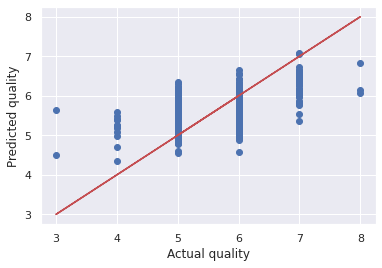

In [39]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

The model seem to be making errors on the best and poor quality wines.

Let's try another model: DecisionTreeRegressor.

In [40]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr, wine_labels)

DecisionTreeRegressor()

Notice similarity between two code snippets.
| **Linear Regression** | **Decision Tree** |
| :- | :- |
| lin_reg.**fit(wine_features_tr, wine_labels)** | tree_reg.**fit(wine_features_tr, wine_labels)** |

In [41]:
quality_predictions = tree_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.0

In [42]:
quality_test_predictions = tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.58125

- Note that the training error is 0, while the test error is 0.58. This is an example of an
overfitted model.

Text(0, 0.5, 'Predicted quality')

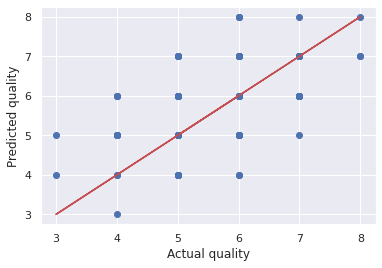

In [43]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

We can use cross-validation (CV) for robust evaluation of model performance.


In [44]:
from sklearn.model_selection import cross_val_score

- Cross validation provides a separate MSE for each validation set, which we can
use to get a mean estimation of MSE as well as the standard deviation, which
helps us to determine how precise is the estimate.
- The additional cost we pay in cross validation is additional training runs, which
may be too expensive in certain cases.

In [45]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

#### Linear Regression CV

In [46]:
scores = cross_val_score(lin_reg, wine_features_tr, wine_labels,scoring="neg_mean_squared_error", cv=10)
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

Scores: [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean: 0.431639217212196
Standard deviation: 0.08356359730413966


#### Decision tree CV

In [47]:
scores = cross_val_score(tree_reg, wine_features_tr, wine_labels,scoring="neg_mean_squared_error", cv=10)
tree_mse_scores = -scores
display_scores(tree_mse_scores)

Scores: [0.6171875  0.6875     0.6328125  0.5078125  0.4609375  0.640625
 0.65625    0.7109375  0.859375   1.07874016]
Mean: 0.6852177657480315
Standard deviation: 0.16668343331737054


Let's compare scores of Linear regression (LinReg) and decision tree (DT) regressions:
- LinReg has better MSE and more precise estimation compared to DT.

#### Random forest CV
- Random forest model builds multiple decision trees on randomly selected features and then average their predictions.
- Building a model on top of other model is called ***ensemble learning***, which is often used to improve performance of ML models.

In [48]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr, wine_labels)
scores = cross_val_score(forest_reg, wine_features_tr, wine_labels,scoring="neg_mean_squared_error", cv=10)
forest_mse_scores = -scores
display_scores(forest_mse_scores)

Scores: [0.36989922 0.41363672 0.29063438 0.31722344 0.21798125 0.30233828
 0.27124922 0.38747344 0.42379219 0.46229449]
Mean: 0.34565226131889765
Standard deviation: 0.0736322184302973


In [49]:
quality_test_predictions = forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.34449875

Text(0, 0.5, 'Predicted quality')

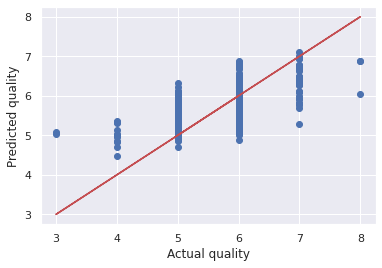

In [50]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

- Random forest looks more promising than the other two models.
    - It's a good practice to build a few such models quickly without tuning their hyperparameters and shortlist a few promising models among them.
    - Also save the models to the disk in Python **pickle** format.

#### What to do next?
| **Model diagnosis** | **Remedy** |
| :- | :- |
| Underfitting | Models with more capacity |
|  | Less constraints/regularization |
| Overfitting | More data |
|  | Simpler model |
|  | More constraints/regularization |
## Step 6: Finetune your model
- Usually there are a number of hyperparameters in the model, which are set manually.
- Tuning these hyperparameters lead to better accuracy of ML models.
- Finding the best combination of hyperparameters is a search problem in the space of hyperparameters, which is huge.

#### [Grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- Scikit-Learn provives a class GridSearchCV that helps us in this pursuit.

In [51]:
from sklearn.model_selection import GridSearchCV

- We need to specify a list of hyperparameters along with the range of values to try.
- It automatically evaluates all possible combinations of hyperparameter values using cross-validation.

For example, there are number of hyperparameters in RandomForest regression
such as:
- Number of estimators
- Maximum number of features

In [52]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

Here the parameter grid contains two combinations:
1. The first combination contains ``n_estimators`` with 3 values and ``max_features`` with 4 values.
2. The second combination has an additional ``bootstrap`` parameter, which is set to False. Note that it was set to its default value, which is **True**, in the first grid.

Let's compute the total combinations evaluated here:
1. The first one results in 3 × 4 = 12 combinations.
2. The second one has 2 values of ``n_estimators`` and 3 values of ``max_features``, thus resulting 2 × 3 = 6 in total of values.

The total number of combinations evaluated by the parameter grid 12 + 6 = 18
Let's create an object of ``GridSearchCV``:

In [53]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',
                            return_train_score=True)

- In this case, we set **cv=5** i.e. using 5 fold cross validation for training the model.
- We need to train the model for 18 parameter combinations and each combination would be trained 5 times as we are using cross-validation here.
- The total model training runs = 18 × 5 = 90

Let's launch the hyperparameter search:

In [54]:
grid_search.fit(wine_features_tr, wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best parameter combination can be obtained as follows:

In [55]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

Let's find out the error at different parameter settings:

In [56]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

0.5096674155773421 {'max_features': 2, 'n_estimators': 3}
0.38494794730392157 {'max_features': 2, 'n_estimators': 10}
0.35890284926470584 {'max_features': 2, 'n_estimators': 30}
0.4765907543572984 {'max_features': 4, 'n_estimators': 3}
0.37949047181372547 {'max_features': 4, 'n_estimators': 10}
0.3677285709422658 {'max_features': 4, 'n_estimators': 30}
0.47674223856209147 {'max_features': 6, 'n_estimators': 3}
0.39086173406862745 {'max_features': 6, 'n_estimators': 10}
0.35285364923747276 {'max_features': 6, 'n_estimators': 30}
0.47786049836601296 {'max_features': 8, 'n_estimators': 3}
0.37944690563725486 {'max_features': 8, 'n_estimators': 10}
0.35524742306644874 {'max_features': 8, 'n_estimators': 30}
0.4390253948801742 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3897452818627451 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4490985838779956 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3858988664215686 {'bootstrap': False, 'max_feature

As you can notice the lowest MSE is obtained for the best parameter combination.

Let's obtain the best estimator as follows:

In [57]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

**Note**: ``GridSearchCV`` is initialized with ``refit=True`` option, which retrains the best
estimator on the full training set. This is likely to lead us to a better model as it is
trained on a larger dataset.

### [Randomized Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- When we have a large hyperparameter space, it is desirable to try RandomizedSearchCV.
- It selects a random value for each hyperparameter at the start of each iteration and repeats the process for the given number of random combinations.
- It enables us to search hyperparameter space with appropriate budget control.

In [58]:
from sklearn.model_selection import RandomizedSearchCV

### Analysis of best model and its errors
Analysis of the model provides useful insights about features. let's obtain the feature
importance as learnt by the model:

In [59]:
feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, feature_list), reverse=True)

[(0.2486711653610271, 'alcohol'),
 (0.14163642739406354, 'sulphates'),
 (0.12665569639367016, 'volatile acidity'),
 (0.08045272518319231, 'total sulfur dioxide'),
 (0.07275072016325315, 'density'),
 (0.05822554296729619, 'citric acid'),
 (0.05791188978825248, 'chlorides'),
 (0.057124416693656116, 'pH'),
 (0.056416454671447944, 'residual sugar'),
 (0.05388861091468478, 'fixed acidity'),
 (0.04626635046945642, 'free sulfur dioxide')]

- Based on this information, we may drop features that are not so important.
- It is also useful to analyze the errors in prediction and understand its causes and fix
them.
#### Evaluation on test set
Now that we have a reasonable model, we evaluate its performance on the test set. The
following steps are involved in the process:
1. Transform the test features.

In [60]:
# copy all features leaving aside the label.
wine_features_test = strat_test_set.drop("quality", axis=1)
# copy the label list
wine_labels_test = strat_test_set['quality'].copy()
# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

2. Use the predict method with the trained model and the test set.

In [61]:
quality_test_predictions = grid_search.best_estimator_.predict(wine_features_test_tr)

3. Compare the predicted labels with the actual ones and report the evaluation metrics.

In [62]:
mean_squared_error(wine_labels_test, quality_test_predictions)

0.35345138888888883

4. It's a good idea to get 95% confidence interval of the evaluation metric. It can be
obtained by the following code:

In [63]:
from scipy import stats
confidence = 0.95
squared_errors = (quality_test_predictions - wine_labels_test) ** 2
stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),scale=stats.sem(squared_errors))

(0.29159276569581916, 0.4153100120819586)

## Step 7: Present your solution
Once we have satisfactory model based on its performance on the test set, we reach
the prelaunch phase.

Before launch,

1. We need to present our solution that highlights learnings, assumptions and systems limitation.
2. Document everything, create clear visualizations and present the model.
3. In case, the model does not work better than the experts, it may still be a good idea to launch it and free up bandwidths of human experts.

## Step 8: Launch, monitor and maintain your system
Launch
- Plug in input sources and
- Write test cases

Monitoring
- System outages
- Degradation of model performance
- Sampling predictions for human evaluation
- Regular assessment of data quality, which is critical for model performance

Maintenance
- Train model regularly every fixed interval with fresh data.
- Production roll out of the model.